In [1]:
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import numpy as np
import scipy.io as sio
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
import random
from collections import Counter
np.random.seed(0)
random.seed(0)
ran=0
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn import preprocessing

from sklearn.svm import SVC

from sklearn.decomposition import PCA

from sklearn.neural_network import MLPClassifier

from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingClassifier,BaggingRegressor

import xgboost as xgb
import os
import seaborn as sn
import pandas as pd
from sklearn.utils import class_weight
from sklearn import preprocessing

import mat73

In [2]:

path = r'D:/COVID/COVID_HF_spectrum/result/'

Data_ver=['COVID','healthy','dyspnea_normal','dyspnea_exercise','sleep'] 


#'COVID'
path1=os.path.join(path, 'Feat_NCS/featureAll/acc_gyro_seperate_v1_newTh2/all_p_Feat_covid.mat')
data = mat73.loadmat(path1)
feat_acc_covid=data['EpochFeat_sel_acc_all_p'] # 3 optimal channels, choose 0 channel first  
feat_ncs_covid=data['EpochFeat_sel_ncs_all_p']
p_ncs_covid=data['p_num_ncs_all_p']  # number of participant of every feature 
p_acc_covid=data['p_num_acc_all_p']


#'healthy'
path_t=os.path.join(path, 'Feat_NCS_healthy/featureAll/acc_gyro_seperate_v1/01_allFeat_healthy.mat')
data = mat73.loadmat(path_t)
feat_acc_healthy=data['EpochFeat_sel_acc'] # 3 optimal channels, choose 0 channel first  
feat_ncs_healthy=data['EpochFeat_sel_ncs']



#'sleep'

path_t=os.path.join('D:/COVID/sleep study/dataSet/featureAll', 'feature_data.mat')
data = sio.loadmat(path_t)
feat_ncs_sleep_Normal=data['featureNCS_0']
feat_ncs_sleep_Disorder=data['featureNCS_1']
p_ncs_sleep_Normal=data['caseNumNCS_0']
p_ncs_sleep_Disorder=data['caseNumNCS_1']

feat_psg_sleep_Normal=data['featurePSG_0']
feat_psg_sleep_Disorder=data['featurePSG_1']
p_psg_sleep_Normal=data['caseNumPSG_0']
p_psg_sleep_Disorder=data['caseNumPSG_1']





In [4]:
path_t=os.path.join(path, 'dyspnea/featureAll/dyspnea_normal_feat.mat')
data = sio.loadmat(path_t)
feat_ncs_dysp_Normal=data['EpochFeat_ncs_all'] # 3 optimal channels, choose 0 channel first  
feat_bio_dysp_Normal=data['EpochFeat_bio_all']
p_ncs_dysp_Normal=data['case_num_ncs']  # number of participant of every feature 
p_bio_dysp_Normal=data['case_num_bio']

path_t=os.path.join(path, 'dyspnea/featureAll/dyspnea_exercise_feat.mat')
data = sio.loadmat(path_t)
feat_ncs_dysp_Exercise=data['EpochFeat_ncs_all'] 
feat_bio_dysp_Exercise=data['EpochFeat_bio_all']
p_ncs_dysp_Exercise=data['case_num_ncs'] 
p_bio_dysp_Exercise=data['case_num_bio']
   
    # model 1: binary class  only label normal =1, exercise =0  in dyspnea study 
label_ncs_dysp_Exercise=np.zeros((np.shape(feat_ncs_dysp_Exercise)[0],1))
label_ncs_dysp_Exercise[:]=1

label_ncs_dysp_Normal=np.zeros((np.shape(feat_ncs_dysp_Normal)[0],1))
label_ncs_dysp_Normal[:]=0



In [5]:
X_train=np.vstack((feat_ncs_dysp_Normal,feat_ncs_dysp_Exercise))
y_train=np.vstack((label_ncs_dysp_Normal,label_ncs_dysp_Exercise)).ravel()
print(np.unique(y_train))
X_test=feat_acc_covid[:,:51,0]
y_test=np.zeros((np.shape(p_acc_covid)[0],1))
y_test[:]=1

y_test=y_test.ravel()
X_test2=feat_acc_healthy[:,:51,0]

X_train_scaler=preprocessing.StandardScaler().fit(X_train).transform(X_train)

X_test_scaler=preprocessing.StandardScaler().fit(X_train).transform(X_test)
X_test2_scaler=preprocessing.StandardScaler().fit(X_train).transform(X_test2)




X_train=X_train_scaler
X_test=X_test_scaler
X_test2=X_test2_scaler


[0. 1.]


In [25]:

clf1=KNeighborsClassifier(n_neighbors=40)

clf2 = DecisionTreeClassifier(random_state=0,max_depth=20)

clf3 = GaussianNB(var_smoothing=0.5)
clf4= svm.SVC(kernel="poly", C=0.5)
clf5 = RandomForestClassifier(max_depth=13,random_state=0,n_estimators=3)
clf6 = BaggingClassifier(base_estimator=clf3,n_estimators=10, random_state=0)

clf7 = xgb.XGBClassifier(n_estimators=5)
 
# clf=clf7.fit(X_train, y_train)
# y_pred_test = clf.predict(X_test)
model=clf3.fit(X_train, y_train)
y_pred_test_covid = model.predict(X_test)

y_pred_test_covid=np.array(y_pred_test_covid)

mean_y_covid=np.mean(y_pred_test_covid)
print(mean_y_covid)


y_pred_test_healthy = model.predict(X_test2)
y_pred_test_healthy=np.array(y_pred_test_healthy)
mean_y_healthy=np.mean(y_pred_test_healthy)
print(mean_y_healthy)

pred_psg_sleep_Normal = model.predict(preprocessing.StandardScaler().fit(X_train).transform(feat_psg_sleep_Normal))
pred_psg_sleep_Normal=np.array(pred_psg_sleep_Normal)
mean_pred_psg_sleep_Normal=np.mean(pred_psg_sleep_Normal)
std_pred_psg_sleep_Normal=np.std(pred_psg_sleep_Normal)
print(mean_pred_psg_sleep_Normal)

pred_psg_sleep_Disorder = model.predict(preprocessing.StandardScaler().fit(X_train).transform(feat_psg_sleep_Disorder))
pred_psg_sleep_Disorder=np.array(pred_psg_sleep_Disorder)
mean_pred_psg_sleep_Disorder=np.mean(pred_psg_sleep_Disorder)
std_pred_psg_sleep_Disorder=np.std(pred_psg_sleep_Disorder)
print(mean_pred_psg_sleep_Disorder)

0.9984854355253425
0.43094841930116473
0.9934984016904156
0.9956118966357874


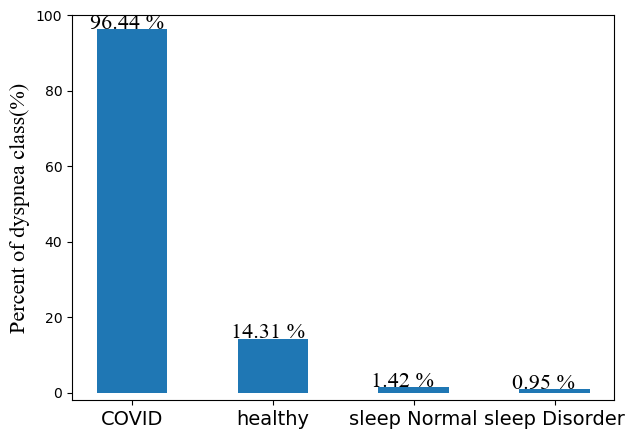

In [22]:
y=np.array([mean_y_covid,mean_y_healthy,mean_pred_psg_sleep_Normal,mean_pred_psg_sleep_Disorder]).ravel()



acc1_all_per=np.array([mean_y_covid,mean_y_healthy,mean_pred_psg_sleep_Normal,mean_pred_psg_sleep_Disorder]).ravel()
XN=['COVID','healthy','sleep Normal','sleep Disorder']
bar_width = 0.5
sz=16
fig, ax = plt.subplots(figsize=(7, 5))
x = np.arange(len(acc1_all_per))+1 

# Note we add the `width` parameter now which sets the width of each bar.
b1 = ax.bar(x, acc1_all_per*100,width=bar_width)



plt.ylim(np.amin(acc1_all_per)*100-3, 100)
plt.grid(False)
axis_font={'fontname':'Times New Roman', 'size':str(sz)}

plt.xticks(x,XN,fontsize=str(sz-2))
plt.ylabel('Percent of dyspnea class(%)',axis_font)

for i in range(len(x)):
  s='{n:.2f} %'.format(n=acc1_all_per[i]*100)
  plt.text(x[i]-0.3,acc1_all_per[i]*100+0.1,s,axis_font)


tleSave='dyspnea_class_pred_bar_plot'
saveFigPath=r"D:\COVID\ML model code"
plt.savefig(saveFigPath+r"/fig_python/"+tleSave+".png", dpi=300)

plt.show()